In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv("data/jena_1_1_2024_30_6_2024.csv")

In [3]:
data_frame.head(7)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),CO2 (ppm)
0,01.01.2024 00:10:00,979.65,7.63,282.43,2.83,71.53,10.47,7.49,2.98,4.77,...,3.37,5.04,209.0,0.0,0.0,0.0,0.0,0.0,15.38,428.8
1,01.01.2024 00:20:00,979.56,7.63,282.45,2.76,71.18,10.47,7.45,3.02,4.75,...,2.63,4.50,204.5,0.0,0.0,0.0,0.0,0.0,15.42,428.1
2,01.01.2024 00:30:00,979.51,7.56,282.37,2.66,71.00,10.42,7.40,3.02,4.71,...,3.48,6.96,208.1,0.0,0.0,0.0,0.0,0.0,15.47,428.3
3,01.01.2024 00:40:00,979.43,7.51,282.33,2.59,70.91,10.38,7.36,3.02,4.69,...,3.73,5.13,201.8,0.0,0.0,0.0,0.0,0.0,15.52,427.8
4,01.01.2024 00:50:00,979.35,7.42,282.25,2.51,70.93,10.32,7.32,3.00,4.66,...,3.06,4.21,198.6,0.0,0.0,0.0,0.0,0.0,15.53,428.0
5,01.01.2024 01:00:00,979.34,7.20,282.03,2.46,71.76,10.17,7.30,2.87,4.65,...,3.59,7.01,208.0,0.0,0.0,0.0,0.0,0.0,15.51,428.1
6,01.01.2024 01:10:00,979.25,7.12,281.95,2.42,71.97,10.11,7.27,2.83,4.63,...,3.70,5.89,205.1,0.0,0.0,0.0,0.0,0.0,15.45,427.9


In [ ]:

    id = Column(Integer, primary_key=True, index=True)
    date_time = Column(Text)
    p = Column(Double)
    T = Column(Double)
    rh = Column(Double)
    VPact = Column(Double)
    wv = Column(Double)
    rho = Column(Double)

In [9]:
df = data_frame[['Date Time', 'T (degC)', 'p (mbar)', 'rh (%)', 'VPact (mbar)', 'wv (m/s)', 'rho (g/m**3)']]
df_renamed = df.rename(columns={"Date Time": "date_time", "T (degC)": "T", "p (mbar)": "p", "rh (%)": "rh", "VPact (mbar)": "Vpact", "wv (m/s)": "wv", "rho (g/m**3)": "rho"})

In [11]:
df_renamed.to_csv("./data/weather_data.csv")

In [174]:
# data_frame['Date Time'] = pd.to_datetime(data_frame['Date Time'], format="%d.%m.%Y %H:%M:%S")
# data_frame.set_index('Date Time', inplace=True)
# data_frame = data_frame.resample('H').mean()
# data_frame.to_csv('data/weather_data_hourly.csv')
# data_frame = pd.read_csv("data/weather_data_hourly.csv")

In [175]:
time = data_frame['Date Time']
temperature = data_frame['T (degC)']
pressure = data_frame['p (mbar)']
relative_humidity = data_frame['rh (%)']
vapor_pressure = data_frame['VPact (mbar)']
wind_speed = data_frame['wv (m/s)']
airtight = data_frame['rho (g/m**3)']

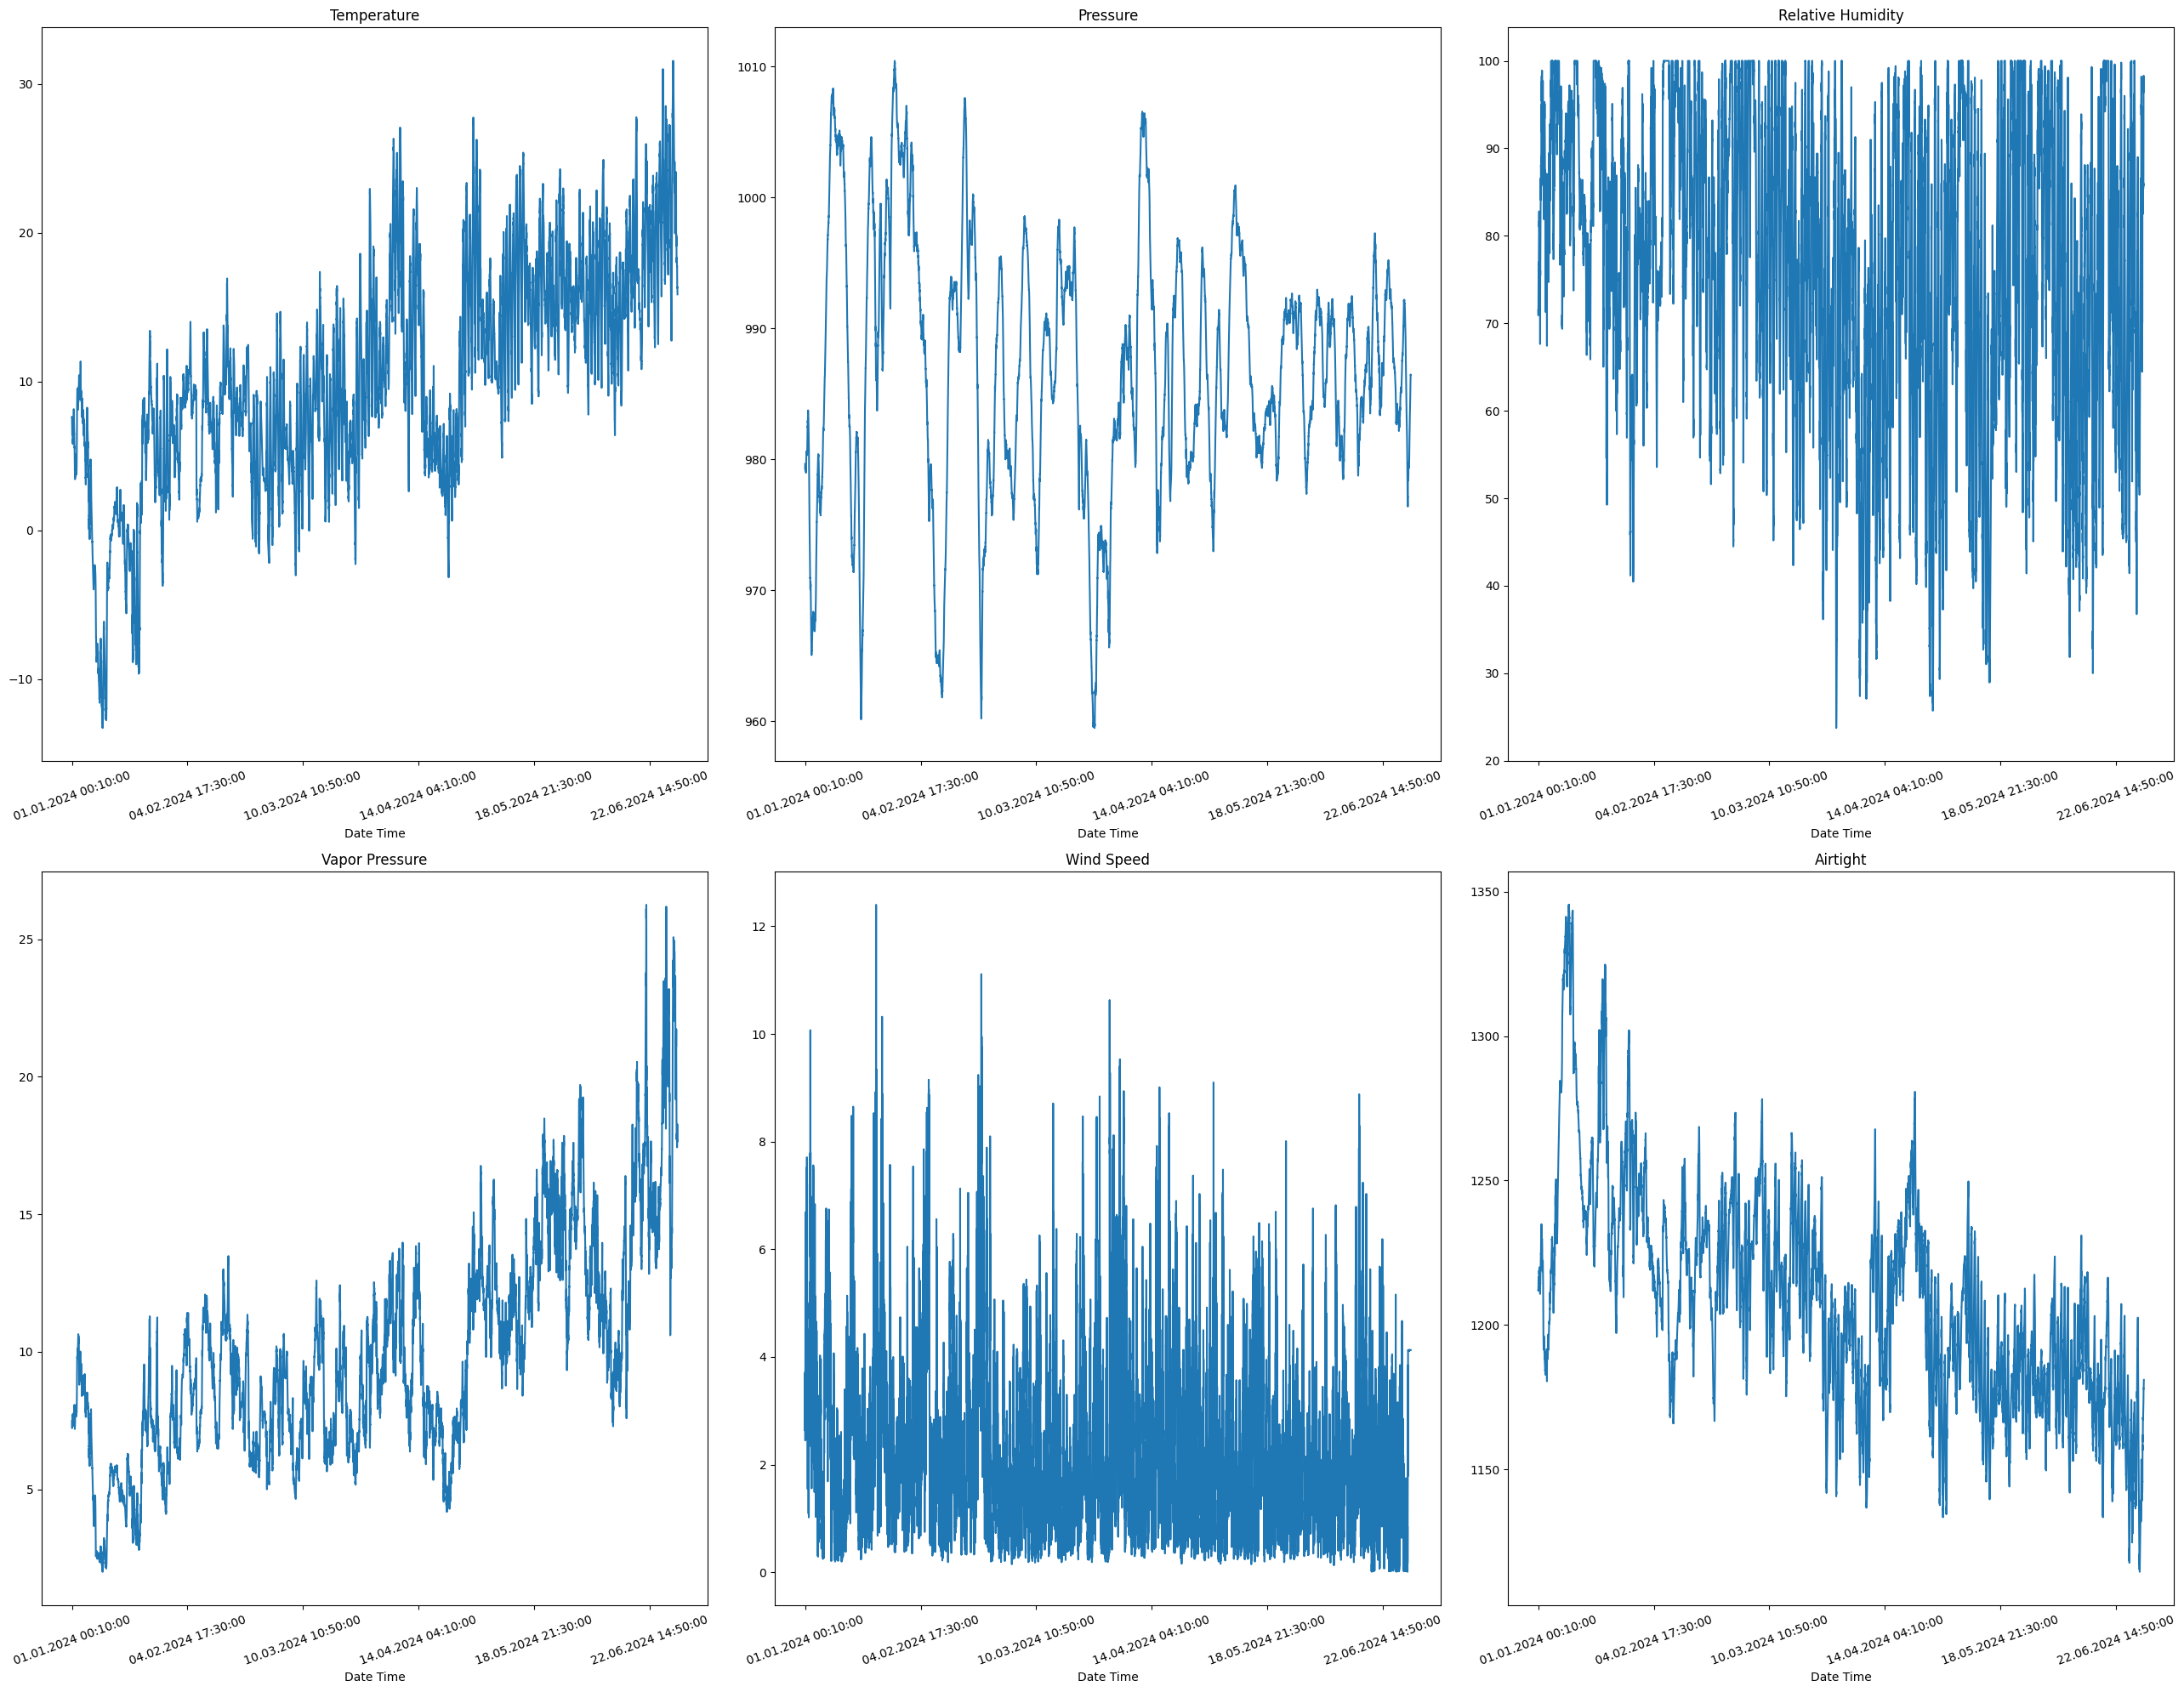

In [176]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.subplots(nrows=2, ncols=3, figsize=(26, 20))

ax = plt.subplot(2, 3, 1)
temperature.index = time
temperature.head()
temperature.plot(rot=20)
plt.title('Temperature')

ax = plt.subplot(2, 3, 2)
pressure.index = time
pressure.head()
pressure.plot(rot=20)
plt.title('Pressure')

ax = plt.subplot(2, 3, 3)
relative_humidity.index = time
relative_humidity.head()
relative_humidity.plot(rot=20)
plt.title('Relative Humidity')

ax = plt.subplot(2, 3, 4)
vapor_pressure.index = time
vapor_pressure.head()
vapor_pressure.plot(rot=20)
plt.title('Vapor Pressure')

ax = plt.subplot(2, 3, 5)
wind_speed.index = time
wind_speed.head()
wind_speed.plot(rot=20)
plt.title('Wind Speed')

ax = plt.subplot(2, 3, 6)
airtight.index = time
airtight.head()
airtight.plot(rot=20)
plt.title('Airtight')

plt.tight_layout()
plt.show()

In [177]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

In [178]:
features = pd.concat([temperature, pressure, relative_humidity, vapor_pressure, wind_speed, airtight], axis=1)
features.index = time
features

,T (degC),p (mbar),rh (%),VPact (mbar),wv (m/s),rho (g/m**3)
Date Time,,,,,,
01.01.2024 00:10:00,7.63,979.65,71.53,7.49,3.37,1211.93
01.01.2024 00:20:00,7.63,979.56,71.18,7.45,2.63,1211.82
01.01.2024 00:30:00,7.56,979.51,71.00,7.40,3.48,1212.11
01.01.2024 00:40:00,7.51,979.43,70.91,7.36,3.73,1212.25
01.01.2024 00:50:00,7.42,979.35,70.93,7.32,3.06,1212.56
...,...,...,...,...,...,...
30.06.2024 23:10:00,16.07,986.31,97.00,17.74,4.13,1179.91
30.06.2024 23:20:00,16.01,986.38,97.10,17.69,4.13,1180.27
30.06.2024 23:30:00,16.01,986.46,96.90,17.66,4.13,1180.38


In [179]:
features = normalize(features.values)
features = pd.DataFrame(features)
features

,0,1,2,3,4,5
0,-0.337038,-0.750402,-0.314734,-0.617065,0.687806,0.049977
1,-0.337038,-0.759627,-0.334745,-0.627389,0.230389,0.047019
2,-0.346503,-0.764752,-0.345036,-0.640294,0.755800,0.054816
3,-0.353264,-0.772952,-0.350182,-0.650618,0.910333,0.058580
4,-0.365433,-0.781152,-0.349038,-0.660941,0.496185,0.066914
...,...,...,...,...,...,...
26202,0.804163,-0.067762,1.141493,2.028404,1.157585,-0.810870
26203,0.796050,-0.060587,1.147211,2.015499,1.157585,-0.801191
26204,0.796050,-0.052387,1.135776,2.007756,1.157585,-0.798234
26205,0.787938,-0.050337,1.164363,2.012918,1.157585,-0.791244


In [180]:
training_size = int ( 0.8 * features.shape[0])  
train_data = features.loc[0 : training_size - 1]
val_data = features.loc[training_size:]

In [181]:
start = 432 + 36
end = start + training_size

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = int(432 / 6)

In [182]:
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    batch_size=64,
)

In [183]:
x_val_end = len(val_data) - start

label_start = training_size + start

x_val = val_data.iloc[:x_val_end][[i for i in range(6)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    batch_size=64,
)

In [184]:
print(dataset_val)

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 6), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>


In [185]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "Weather_forcaster"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 72, 6)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
history = model.fit(
    dataset_train,
    epochs=15,
    validation_data=dataset_val
)

Epoch 1/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.6327 - val_loss: 0.3424
Epoch 2/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.8229 - val_loss: 0.3337
Epoch 3/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.8238 - val_loss: 0.3223
Epoch 4/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.7988 - val_loss: 0.3183
Epoch 5/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.7705 - val_loss: 0.3100
Epoch 6/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.7475 - val_loss: 0.3038
Epoch 7/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.7194 - val_loss: 0.2990
Epoch 8/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6944 - val_loss: 0.2956
Epoch 9/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.7000 - val_loss: 0.2985
Epoch 10/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6567 - val_loss: 0.3087
Epoch 11/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6473 - val_loss: 0.2994
Epoch 12/15
327/327 ━━━━━━━━━━━━━━━━━━━━ 

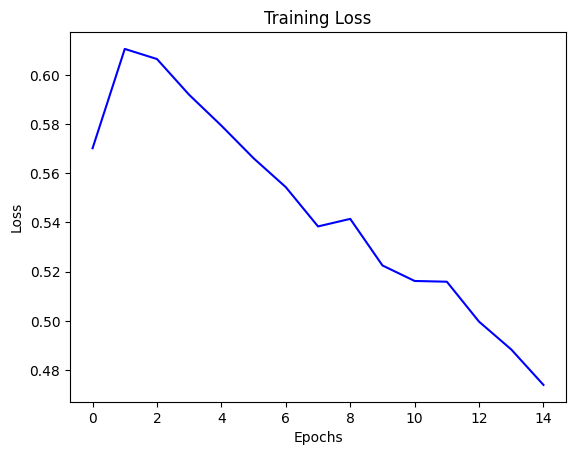

In [187]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


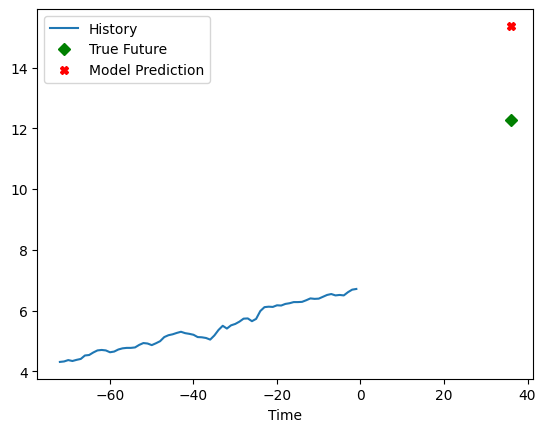

TRUE: [12.29004135] || PREDICTION: [15.3748027]


In [188]:
temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

for x, y in dataset_val.skip(12):
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(36, true_value, "gD")
    plt.plot(36, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    print(f"TRUE: {true_value} || PREDICTION: {prediction}")
    break
    

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


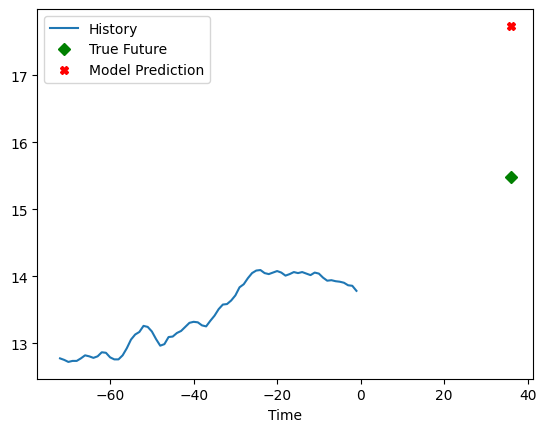

TRUE: [15.48010222] || PREDICTION: [17.73937257]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


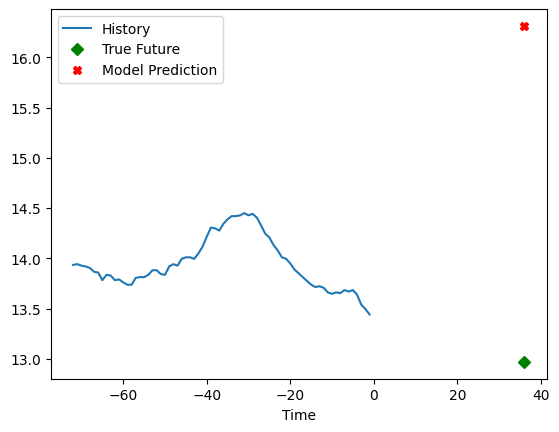

TRUE: [12.97005433] || PREDICTION: [16.3116673]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


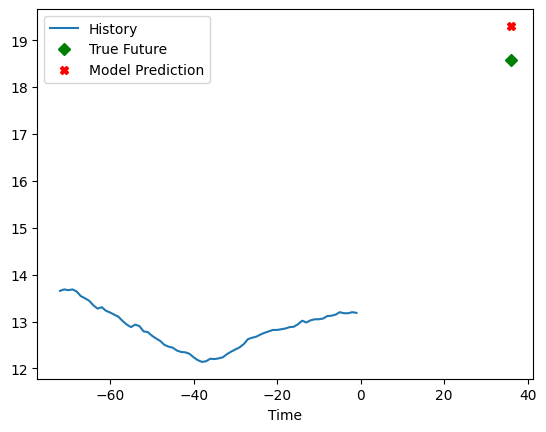

TRUE: [18.58016136] || PREDICTION: [19.30522436]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


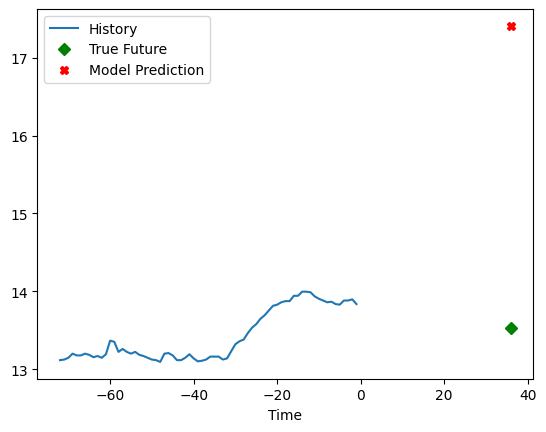

TRUE: [13.53006501] || PREDICTION: [17.40782271]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


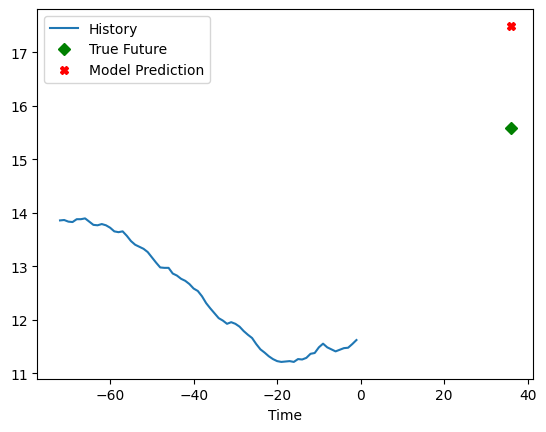

TRUE: [15.59010431] || PREDICTION: [17.49535077]


In [189]:
temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

for x, y in dataset_val.take(5):
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(36, true_value, "gD")
    plt.plot(36, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    print(f"TRUE: {true_value} || PREDICTION: {prediction}")
    